In [ ]:
# import library
import pandas as pd
import numpy as np

In [ ]:
# Nomer 1
# Berdasarkan dataset MovieLens 1M, film manakah yang paling disenangi para wanita?
# (hint: pakai jurus pivot table)

# movies name
mnames = ['movieid', 'title', 'genres']
movies_data = pd.read_table('movies.dat', sep='::', header=None, names=mnames, engine='python', encoding='latin-1')
print('movie shape: ',movies_data.shape)
movies_data.info()

movie shape:  (3883, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieid  3883 non-null   int64 
 1   title    3883 non-null   object
 2   genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [ ]:
movies_data.head()

,movieid,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# check unique movies
unique_movies = movies_data['movieid'].unique().tolist()
len(unique_movies)

3883

In [ ]:
rnames = ['userid','movieid','rating','timestamp']
ratings_data = pd.read_table('ratings.dat', sep='::', header=None, names=rnames, engine='python', encoding='latin-1')
print('movie shape: ',ratings_data.shape)
ratings_data.info()

movie shape:  (1000209, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   userid     1000209 non-null  int64
 1   movieid    1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [ ]:
mapping = {
    1: '0-18',
    18: '18-24',
    25: '25-34',
    35: '35-44',
    45: '45-49',
    50: '50-55',
    56: '56+'
}
unames = ['userid','gender','age','occupation','zipcode']
users_data = pd.read_table('users.dat', sep='::', header=None, names=unames, engine='python', encoding='latin-1')
users_data['age'] = users_data['age'].replace(mapping)
users_data.head(5)

,userid,gender,age,occupation,zipcode
0,1,F,0-18,10,48067
1,2,M,56+,16,70072
2,3,M,25-34,15,55117
3,4,M,45-49,7,02460
4,5,M,25-34,20,55455


In [ ]:
movie_ratings_data = movies_data.merge(ratings_data, on='movieid', how='inner')
movie_ratings_data

,movieid,title,genres,userid,rating,timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474
...,...,...,...,...,...,...
1000204,3952,"Contender, The (2000)",Drama|Thriller,5812,4,992072099
1000205,3952,"Contender, The (2000)",Drama|Thriller,5831,3,986223125
1000206,3952,"Contender, The (2000)",Drama|Thriller,5837,4,1011902656
1000207,3952,"Contender, The (2000)",Drama|Thriller,5927,1,979852537


In [ ]:
data = pd.merge(movie_ratings_data, users_data)
data

,movieid,title,genres,userid,rating,timestamp,gender,age,occupation,zipcode
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,0-18,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,0-18,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,0-18,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,0-18,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,0-18,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25-34,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25-34,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25-34,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25-34,4,92843


In [ ]:
data_favorite_female = data.loc[data['gender'] == 'F']
data_favorite_female.head(5)

,movieid,title,genres,userid,rating,timestamp,gender,age,occupation,zipcode
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,0-18,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,0-18,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,0-18,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,0-18,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,0-18,10,48067


In [ ]:
data_favorite_female.shape

(246440, 10)

In [ ]:
by_gender_female = data_favorite_female.groupby(['title','gender']).agg({'rating':[np.size, np.mean]}).sort_values(('rating', 'mean'),ascending=True)
by_gender_female.head(20)

rating     
                                                            size mean
title                                              gender            
Slumber Party Massacre III, The (1990)             F           4  1.0
Circus (2000)                                      F           1  1.0
Wirey Spindell (1999)                              F           1  1.0
Sixth Man, The (1997)                              F           2  1.0
Prom Night III: The Last Kiss (1989)               F           2  1.0
Toxic Avenger Part III: The Last Temptation of ... F           2  1.0
Meet Wally Sparks (1997)                           F           2  1.0
Truce, The (1996)                                  F           1  1.0
Stalingrad (1993)                                  F           1  1.0
Cheetah (1989)                                     F           1  1.0
Bloodsport 2 (1995)                                F           2  1.0
Tigrero: A Film That Was Never Made (1994)         F           1  1.0
Suburbans, The (1999)                              F           1  1.0
Flying Saucer, The (1950)                          F           1  1.0
Carnosaur 3: Primal Species (1996)                 F           2  1.0
Time Masters (Les Maîtres du Temps) (1982)         F           1  1.0
Silence of the Palace, The (Saimt el Qusur) (1994) F           1  1.0
Carnosaur 2 (1995)                                 F           3  1.0
My Life and Times With Antonin Artaud (En compa... F           1  1.0
Alien Escape (1995)                                F           2  1.0

In [ ]:
most_rated_female_favorite_film = by_gender_female.sort_values(by=('rating','size'),ascending=False)
most_rated_female_favorite_film.head(10)

rating          
                                                            size      mean
title                                              gender                 
American Beauty (1999)                             F         946  4.238901
Shakespeare in Love (1998)                         F         798  4.181704
Silence of the Lambs, The (1991)                   F         706  4.271955
Sixth Sense, The (1999)                            F         664  4.477410
Groundhog Day (1993)                               F         658  3.735562
Fargo (1996)                                       F         657  4.217656
Star Wars: Episode VI - Return of the Jedi (1983)  F         653  3.865237
Star Wars: Episode V - The Empire Strikes Back ... F         648  4.106481
Star Wars: Episode IV - A New Hope (1977)          F         647  4.302937
Forrest Gump (1994)                                F         644  4.045031

In [ ]:
most_rated_female_favorite_film_pivot = most_rated_female_favorite_film.pivot_table(columns='gender', index='title').fillna(0)
most_rated_female_favorite_film_pivot

rating     
                                       mean size
gender                                    F    F
title                                           
$1,000,000 Duck (1971)             3.375000   16
'Night Mother (1986)               3.388889   36
'Til There Was You (1997)          2.675676   37
'burbs, The (1989)                 2.793478   92
...And Justice for All (1979)      3.828571   35
...                                     ...  ...
Your Friends and Neighbors (1998)  2.888889   27
Zed & Two Noughts, A (1985)        3.500000    8
Zero Effect (1998)                 3.864407   59
Zeus and Roxanne (1997)            2.777778    9
eXistenZ (1999)                    3.098592   71

[3481 rows x 2 columns]

In [ ]:
# Nomer 2
# Film manakah yang paling berpotensi bikin berantem pria dan wanita? Atau yang paling disenangi wanita, tapi dibenci pria?
# (hint: pakai jurus pivot, hitung perbedaan mean rating keduanya)

data_favorite_bygender = data.groupby('gender').size().sort_values(ascending=False)
data_favorite_bygender


gender
M    753769
F    246440
dtype: int64

In [ ]:
by_gender= data.groupby(['title','gender']).agg({'rating':[np.size, np.mean]}).sort_values(('rating', 'mean'),ascending=True)
by_gender.head(20)

rating     
                                                            size mean
title                                              gender            
Blood Spattered Bride, The (La Novia Ensangrent... M           2  1.0
Cheetah (1989)                                     F           1  1.0
Low Life, The (1994)                               M           1  1.0
Babyfever (1994)                                   M           1  1.0
Loves of Carmen, The (1948)                        F           1  1.0
Love, etc. (1996)                                  M           1  1.0
Spiders, The (Die Spinnen, 1. Teil: Der Goldene... M           2  1.0
Crow: Salvation, The (2000)                        F           1  1.0
Spring Fever USA (a.k.a. Lauderdale) (1989)        F           1  1.0
Windows (1980)                                     M           1  1.0
Spring Fever USA (a.k.a. Lauderdale) (1989)        M           2  1.0
Crude Oasis, The (1995)                            M           1  1.0
Wirey Spindell (1999)                              F           1  1.0
                                                   M           1  1.0
Shadows (Cienie) (1988)                            M           1  1.0
Kronos (1957)                                      F           1  1.0
Truce, The (1996)                                  F           1  1.0
Stalingrad (1993)                                  F           1  1.0
Lotto Land (1995)                                  M           1  1.0
Carnosaur 3: Primal Species (1996)                 F           2  1.0

In [ ]:
most_rated_favorite_film = by_gender.sort_values(by=('rating','size'),ascending=False)
most_rated_favorite_film.head(10)

rating          
                                                            size      mean
title                                              gender                 
American Beauty (1999)                             M        2482  4.347301
Star Wars: Episode IV - A New Hope (1977)          M        2344  4.495307
Star Wars: Episode V - The Empire Strikes Back ... M        2342  4.344577
Star Wars: Episode VI - Return of the Jedi (1983)  M        2230  4.069058
Terminator 2: Judgment Day (1991)                  M        2193  4.115367
Jurassic Park (1993)                               M        2099  3.814197
Saving Private Ryan (1998)                         M        2078  4.398941
Matrix, The (1999)                                 M        2076  4.362235
Men in Black (1997)                                M        2000  3.719000
Back to the Future (1985)                          M        1944  4.009259

In [ ]:
most_rated_gender_favorite_film_pivot = most_rated_favorite_film.pivot_table(columns='gender', index='title').fillna(0)
most_rated_gender_favorite_film_pivot.head(10)


rating                        
                                       mean             size       
gender                                    F         M      F      M
title                                                              
$1,000,000 Duck (1971)             3.375000  2.761905   16.0   21.0
'Night Mother (1986)               3.388889  3.352941   36.0   34.0
'Til There Was You (1997)          2.675676  2.733333   37.0   15.0
'burbs, The (1989)                 2.793478  2.962085   92.0  211.0
...And Justice for All (1979)      3.828571  3.689024   35.0  164.0
1-900 (1994)                       2.000000  3.000000    1.0    1.0
10 Things I Hate About You (1999)  3.646552  3.311966  232.0  468.0
101 Dalmatians (1961)              3.791444  3.500000  187.0  378.0
101 Dalmatians (1996)              3.240000  2.911215  150.0  214.0
12 Angry Men (1957)                4.184397  4.328421  141.0  475.0

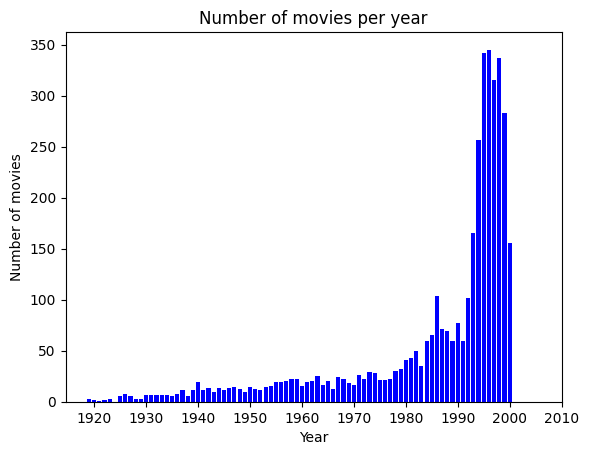

In [ ]:
# Nomer 3
# Buatlah grafik bar berikut (hint: extract tahun pada kolom movie title
# berdasarkan pattern regex berikut '.*\((.*)\).*')

import matplotlib.pyplot as plt
import re

# Load data
movies = pd.read_table('movies.dat', sep='::', names=['movie_id', 'title', 'genres'], engine='python', encoding='latin-1')

# Extract year from title column
movies['year'] = movies['title'].apply(lambda x: re.findall('\((\d{4})\)', x))
movies['year'] = movies['year'].apply(lambda x: int(x[0]) if len(x) > 0 else None)

# Count movies per year
movies_per_year = movies['year'].value_counts().sort_index()

# Plot bar chart
plt.bar(movies_per_year.index, movies_per_year.values, align='center', color='b')
plt.xticks(range(1920, 2020, 10))
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Number of movies per year')
plt.show()

